## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


In [1]:
**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**

SyntaxError: invalid syntax (<ipython-input-1-69cabcd1890b>, line 1)



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

movie_data = pd.read_csv('./tmdb-movies.csv')

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [72]:
# 1.获取数据表的行列，并打印。(第一行的 original_title 列)
print(movie_data['original_title'][0])
# 2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
movie_data.head()
movie_data.tail()
movie_data.sample()
# 3. 使用 `.dtypes` 属性，来查看各列数据的数据类型
movie_data.dtypes
# 4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
movie_data.isnull().any()
#5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。
movie_data.describe()

Jurassic World


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [73]:
# 将NaN空值替换为0
movie_data_fill_zero = movie_data.fillna(0)
# 删除包含 NaN 值的任何行
movie_data_dropna = movie_data.dropna(axis = 0)
# movie_data_dropna.isnull().sum()

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [74]:
# 1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
move_data1 = movie_data[['id', 'popularity', 'budget', 'runtime', 'vote_average']]
# print(move_data1)
# 2. 读取数据表中前1～20行以及48、49行的数据。
moive_data2 = movie_data.iloc[0:20].append(movie_data.iloc[47:49])
# print(moive_data2)
# 3. 读取数据表中第50～60行的 `popularity` 那一列的数据。
moive_data3 = movie_data.iloc[49:60][['popularity']]
# print(moive_data3)

---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [75]:
# 读取数据表中 popularity 大于5 的所有数据。
moive_test = movie_data[movie_data['popularity'] > 5]
# print(moive_test)
# 读取数据表中 popularity 大于5 的所有数据且发行年份在1996年之后的所有数据。
moive_test = movie_data[(movie_data['popularity'] > 5) & (movie_data['release_year'] > 1996)]
# print(moive_test)

---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [76]:
# 对 release_year 进行分组，使用 .agg 获得 revenue 的均值。
# moive_test = movie_data.groupby('release_year')['revenue'].mean()
moive_test = movie_data.groupby('release_year')['revenue'].agg(['mean'])
# print(moive_test)
# 对 director 进行分组，使用 .agg 获得 popularity 的均值，从高到低排列。
moive_test = movie_data.groupby('director')['popularity'].agg(['mean']).sort_values(by="mean" , ascending=False)
# print(moive_test)

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

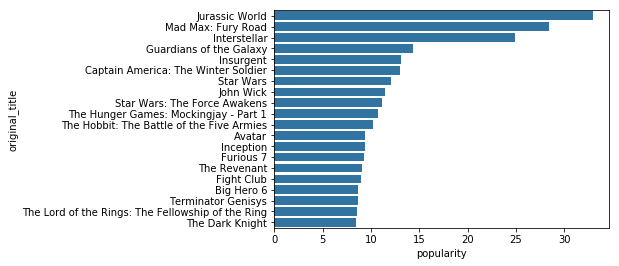

In [77]:
# 按popularity降幂排序，选取其最高的前20数据
movie_popularity = movie_data.sort_values(by='popularity' , ascending=False).head(20)
# print(movie_popularity)
# movie_popularity = movie_data.groupby('original_title')['popularity'].agg(['mean']).sort_values(by="mean" , ascending=False)
# print(movie_popularity.head(5))
base_color = sb.color_palette()[0]
# print(movie_popularity)
# 绘制电影名称对应的popularity柱状图
sb.barplot(data = movie_popularity,y = 'original_title', x = 'popularity',color = base_color);
# plt.xticks(rotation = 90)

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

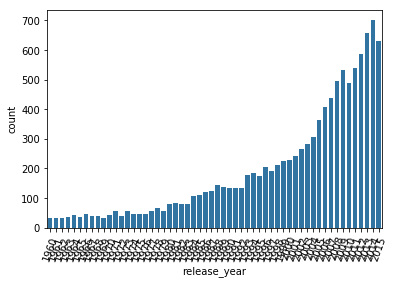

In [113]:
# 筛选年份
year_profit = movie_data[[ 'release_year']]
# 插入利润列
year_profit.insert(1,'profit',movie_data[ 'revenue_adj'] - movie_data['budget_adj'])
# print(year_profit.describe())
base_color = sb.color_palette()[0]
# 用直方图显示年份和利润的关系
sb.countplot(data = year_profit, x = 'release_year', color = base_color);
plt.xticks(rotation = 70);

# 分析
# 从下图可以看出随着年份的增长，电影净利润总体也随着增长

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。